**PUMP IT UP**

Leanne Kendall & Chancellor Tang

**IMPORTING LIBRARIES**

For this project, we needed to import libraries into our python code so it could do the thing we wanted it to do. We imported pandas and numpy so we could use it to create dataframe. We also imported seaborn and matplotlib.pyplot to create graphs for our report. Those are the libraries we started out with, but later on, we imported libraries for machine learning when we needed them.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import statsmodels.api as sm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

**Acquiring Train and Test Datasets**

The combine variable creates a list in order to reduce the amount of code needed to change both the train_df and test_df. Next, we set our notebook to print out all the columns in all dataframes so we could view them all. Finally, we merged the training results onto the main dataframe to find correlations between our target variable and the independent variables. The two head functions were our starting point in previewing the data.

In [2]:
train_df = pd.read_csv ('C:/Users/student/Documents/Pump it Up/train.csv')
test_df = pd.read_csv ('C:/Users/student/Documents/Pump it Up/test.csv')
train_results = pd.read_csv ('C:/Users/student/Documents/Pump it Up/train_labels.csv')
combine = [train_df, test_df]

In [3]:
pd.set_option('max_columns', None)

In [4]:
#merge train_results with rest of train dataset
train_df = pd.merge(train_df,train_results[['status_group','id']], on='id')
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


**Data Columns Preview**

To get a better sense of the independent variables, we printed out a list of all of the columns that were in the train_df dataframe.

In [6]:
print(train_df.columns.values)

['id' 'amount_tsh' 'date_recorded' 'funder' 'gps_height' 'installer'
 'longitude' 'latitude' 'wpt_name' 'num_private' 'basin' 'subvillage'
 'region' 'region_code' 'district_code' 'lga' 'ward' 'population'
 'public_meeting' 'recorded_by' 'scheme_management' 'scheme_name' 'permit'
 'construction_year' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity'
 'quantity_group' 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group' 'status_group']



**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Nominal: funder, installer, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, public_meeting, recorded_by, scheme_management, scheme_name, permit, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group Ordinal: constuction_year, quantity, quantity_group, status_group

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: amount_tsh, gps_height, longitude, latitude  Discrete: Population

**Redundant/ Highly Correlated Data**

There are certain columns in this data set the stick out as being either extremely redundant or highly correlated. Many of these fields will have to be dropped. The following columns contain similar information:

- extraction_type, extraction_type_group, extraction_type_class
- management, management_group
- payment, payment_type
- water_quality, quality_group	
- quantity, quantity_group
- source, source_type, source_class
- waterpoint_type, waterpoint_type_group


**Missing Values & Bad Data**

Let's observe how many '0's' we have in each column and if this number of '0's' makes sense. Let's also look at the number of null values per field. 

- We see that "amount_tsh", gps_height", "longitude","num_private", "population", "public_meeting", "permit", and "construction_year" contain an abnormal amount of '0's'
- We also see that "funder", "installer","subvillage", "public_meeting", "scheme_management", "scheme_name", and "permit" contain multiple null values. 

These are the fields we will either cleaning or removing from our dataframe

In [7]:
train_df.isin([0]).sum()

id                           1
amount_tsh               41639
date_recorded                0
funder                       0
gps_height               20438
installer                    0
longitude                 1812
latitude                     0
wpt_name                     0
num_private              58643
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code               23
lga                          0
ward                         0
population               21381
public_meeting            5055
recorded_by                  0
scheme_management            0
scheme_name                  0
permit                   17492
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
train_df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

**Dropping Columns**

We decided to drop the fields of ward, num_private, scheme_name, and amount_tsh because they contain too many null values.

In [9]:
train_df.drop(['ward','subvillage','num_private','scheme_name','amount_tsh'], axis=1)

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,region_code,district_code,lga,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,11,5,Ludewa,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,20,2,Serengeti,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,21,4,Simanjiro,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kagera,18,1,Karagwe,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,3,5,Hai,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,11,4,Njombe,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,Rufiji,Mbeya,12,7,Mbarali,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,Dodoma,1,4,Chamwino,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


**Status_num** 

For our project, we wanted to create numerical values to correlate with Status Group to make calculating the functionality of the pump easier. The code below creates three new columns for each result of status group: our one dependent variable.


In [10]:
train_df = pd.get_dummies(train_df, columns=['status_group'])

**Observe Correlations** 

The code below generates all of the correlations between numeric variables. There are no significant correlations with status_num. This tells us that perhaps the non-numeric data may be more important in our model as we go on or significant data cleaning will be needed.

In [11]:
corrMatrix = train_df.corr()
corrMatrix

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group_functional,status_group_functional needs repair,status_group_non functional
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082,-0.003983,0.000472,0.003827
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915,0.052427,-0.004724,-0.051170
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727,0.112990,-0.016435,-0.106942
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732,0.027332,-0.120864,0.036516
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278,0.000411,0.051643,-0.027984
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056,0.005780,-0.003810,-0.003886
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724,-0.104178,0.002333,0.105444
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315,-0.056028,-0.025301,0.070882
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910,0.017674,-0.002855,-0.016576
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000,0.051457,-0.038905,-0.031934


**Replace Longitude Values Equal to 0**

When looking at the dataset, our group realized that there can not be a pump at a longitude equal to zero because longitude 0 does not pass through Tanzania, the country where all the pumps are located. 

The code below creates a dataframe with all the records where the longitude = 0. The data in the describe() table for the dataframe shows a majority of the numerical values are equal to 0, and for columns like construction year, 0 does not make any sense. Since there were only 1812 values that were have a longitude equal to 0, our group decided the best thing to do was to drop all of these values from the main dataframe.

In [12]:
train_comb_long = train_df.drop(train_df[train_df.longitude != 0].index)
train_comb_long.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group_functional,status_group_functional needs repair,status_group_non functional
count,1812.000000,1812.0,1812.0,1812.0,1.812000e+03,1812.0,1812.000000,1812.000000,1812.0,1812.0,1812.000000,1812.000000,1812.000000
mean,37389.841060,0.0,0.0,0.0,-2.000000e-08,0.0,17.820088,2.497241,0.0,0.0,0.480132,0.213024,0.306843
std,21413.129962,0.0,0.0,0.0,3.541310e-22,0.0,1.023562,2.157389,0.0,0.0,0.499743,0.409558,0.461311
min,15.000000,0.0,0.0,0.0,-2.000000e-08,0.0,11.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,18481.750000,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,37326.000000,0.0,0.0,0.0,-2.000000e-08,0.0,17.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,55509.750000,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0,1.000000,0.000000,1.000000
max,74193.000000,0.0,0.0,0.0,-2.000000e-08,0.0,19.000000,6.000000,0.0,0.0,1.000000,1.000000,1.000000


Next we got rid of the 0 values for longitude. To do this we found the average longitude per subvillage (since this was the most unique of all the location descriptions) and replaced the 0 value with the average of that subvillage. This code was originally written by one of our classmates, Brenna Rojek.

In [13]:
for dataset in combine:
    dataset['longitude'].replace(0, np.nan, inplace=True)
    dataset.loc[dataset.longitude.isnull(), 'longitude'] = dataset.groupby('subvillage').longitude.transform('mean')
    dataset.loc[dataset.longitude.isnull(), 'longitude'] = dataset.groupby('ward').longitude.transform('mean')
    dataset.loc[dataset.longitude.isnull(), 'longitude'] = dataset.groupby('lga').longitude.transform('mean')
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,35.123630,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,2.585898,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,29.612776,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.282807,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.972424,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.201765,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


**Basin Dummy Variables**

Creating dummy variables for basin helped our group create a regression that determined the functionality of each water pump. To do this, we created a basin_list using the function "unique()", which created a list of all the distinct values in the basin column. 

From there, we made a data dictionary that mapped each list value to an integer 1-9. We chose to do this instead of using basin_list because the first value would be 0, which would potentially throw off the regression. We chose this way over the getdummies function we used for status group because we tried that and when we ran both regressions there was no difference between the one column and the getdummies method. For this reason, while the dictionary maps the basin to a number, they are not treated as ordinal in our regression. With the dictionary, we created a new calculated column (basin_no) by mapping the new columns from the basin column.

For our regression, we started off using basin_no in our decision tree, but we then tried region_code as our location variable, and we got a much higher success percentage than with basin code. While this was not used in our final regression, it helped us create values for construction year, which you will see further below. 

In [14]:
basin_list = train_df.basin.unique()
basin_list = basin_list.tolist()
basin_dict = {basin_list[0] : 1, basin_list[1] : 2, basin_list[2] : 3, basin_list[3] : 4, basin_list[4] : 5, basin_list[5] : 6, basin_list[6] : 7, basin_list[7] : 8, basin_list[8]: 9}
combine = [train_df, test_df]
for dataset in combine:
    dataset['basin_no'] = dataset['basin'].map(basin_dict)
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,basin_no
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,5
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,3
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,5
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,4
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,4


**Repopulating the 0 Values for gps_height**

There are over 20,000 records in the training dataset that have a gps_height of 0. Our group wanted to replace these 0's with something else. Our group decided to populate the 0's with the mode height in each basin. To do this, we first had create 2 new dataframes (train_comb0, test_comb0) that had no heights equal to 0. Next we created 2 lists of undefined variables (train_list, test_list) and created a for loop that set the variables in the list equal to the dataframes with no 0 heights and filtered out each of the tables so they each would be associated with a basin number (basin_no).

In [15]:
train_comb0 = train_df.drop(train_df[train_df.gps_height == 0].index)
test_comb0 = test_df.drop(test_df[test_df.gps_height == 0].index)
train_comb0.describe(include = 'O')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,38962,37440,37435,38962,38962,38952,38962,38962,38962,36610,38962,36449,23665,37012,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962,38962
unique,281,1395,1561,24748,9,12022,17,83,1316,2,1,12,1989,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2/3/2013,Government Of Tanzania,DWE,none,Pangani,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,Chalinze wate,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,519,6500,11026,3406,8553,411,5294,2503,307,33431,38962,23144,405,26284,20082,20082,20082,26575,33849,13940,13940,33903,33903,22698,22698,12773,12773,28998,21394,25723


In [16]:
train1 = pd.DataFrame()
train2 = pd.DataFrame()
train3 = pd.DataFrame()
train4 = pd.DataFrame()
train5 = pd.DataFrame()
train6 = pd.DataFrame()
train7 = pd.DataFrame() 
train8 = pd.DataFrame()
train9 = pd.DataFrame()
test1 = pd.DataFrame()
test2 = pd.DataFrame()
test3 = pd.DataFrame()
test4 = pd.DataFrame()
test5 = pd.DataFrame()
test6 = pd.DataFrame()
test7 = pd.DataFrame()
test8 = pd.DataFrame()
test9 = pd.DataFrame()

In [17]:
# populated tables with basin specific values
train_list = [train1, train2, train3, train4, train5, train6, train7, train8, train9]
test_list = [test1, test2, test3, test4, test5, test6, test7, test8, test9]
zero_list = [train_list, test_list]
for x in range(0,9):
    train_list[x] = train_comb0
    test_list[x] = test_comb0
    for a in zero_list:
        a[x] = a[x].drop(a[x][a[x].basin_no != x + 1].index) 

With each dataframe in the list identifying with a select basin, we wrote code to get the mean gps_height for each dataframe and put them in a list (h), which gave us a list of the average heights in each basin for both dataframes. With the heights in one list, we populated two lists (train_height, test_height) with the means that corresponded to each dataframe. With one more for loop, we repopulated the main dataframes using the mode lists to replace all of the gps_heights equal to 0 with the mean gps_height for the basin that the pump is in.

In [18]:
import statistics
train_height = []
test_height = []
h = []
for zero in zero_list:
    for x in range (0,9):
        b = round(statistics.mean(zero[x].gps_height))
        h.append(b)
print(h)
for a in range(len(h)):
    if a >=  9:
        test_height.append(h[a])
    else:
        train_height.append(h[a])
print(train_height, test_height)

[1525, 1329, 1082, 411, 1475, 1270, 268, 1030, 1415, 1507, 1325, 1082, 420, 1488, 1265, 272, 1032, 1391]
[1525, 1329, 1082, 411, 1475, 1270, 268, 1030, 1415] [1507, 1325, 1082, 420, 1488, 1265, 272, 1032, 1391]


In [19]:
combine = [train_df, test_df]
heights = [train_height, test_height]

for x in range(0,9):
    train_df.loc[(train_df['basin'] == basin_list[x]) & (train_df['gps_height'] ==0), 'gps_height'] = train_height[x]
for x in range(len(basin_list)):
    test_df.loc[(test_df['basin'] == basin_list[x]) & (test_df['gps_height'] ==0), 'gps_height'] = test_height[x]
train_df.gps_height.mode()

0    1329
dtype: int64

**Visualizing GPS Height**

After repopulating all of the possible null heights, our group wanted to see if gps_height was significant. In the correlation matrix earlier on in the report, the highest correlation between gps_height and any of the three status group dummy variables was 0.112, which is not high, so our group wanted to visualize the heights to determine its significance.

Since there are thousands of different possible heights, creating a graph of all the heights would be very difficult because of the sheer amount of them. So, we created a new column called grouped_height that created one column with 3 possible variables based on the gps_height and labeled them with numerical values. (1: less than 1000, 2: 1000 to 2000, 3: 2000 and up).

We created a seperate dataframe that was grouped by those grouped_heights where the only 4 columns returned are grouped_height and the mean value of each of the three status group dummy variables. With those values, we created a stacked bar chart that shows, on a scale of 1, the percent of each status group dummy variable for each height group.

The chart clearly shows a positive correlation between height and functionality. Initially, we used grouped_height in our decision tree. After that, we tested gps_height, and the submission with gps_height came back more successful than the one for grouped_height. Even though we don't use grouped_height in our decision tree, it was good to visualize the significance of the height when determining the functionality of the chart.

In [20]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['grouped_height'] = 0
    dataset.loc[(dataset['gps_height'] < 1000), 'grouped_height'] = 1
    dataset.loc[(dataset['gps_height'] >= 1000) & (dataset['gps_height'] < 2000), 'grouped_height'] = 2
    dataset.loc[(dataset['gps_height'] >= 2000), 'grouped_height'] = 3

In [21]:
height_g = train_df.groupby('grouped_height').mean()
height_g = height_g.drop(['id','amount_tsh','gps_height','latitude','longitude',
                          'district_code','num_private','region_code','population','construction_year',
                         'basin_no'], axis=1)
height_g.head()

,status_group_functional,status_group_functional needs repair,status_group_non functional
grouped_height,,,
1,0.490661,0.059846,0.449492
2,0.557552,0.079810,0.362638
3,0.829388,0.024490,0.146122


([<matplotlib.axis.XTick at 0x19b95615d90>,
 [Text(0, 0, 'Less than 1000'), Text(0, 0, '1000-2000'), Text(0, 0, '2000+')])

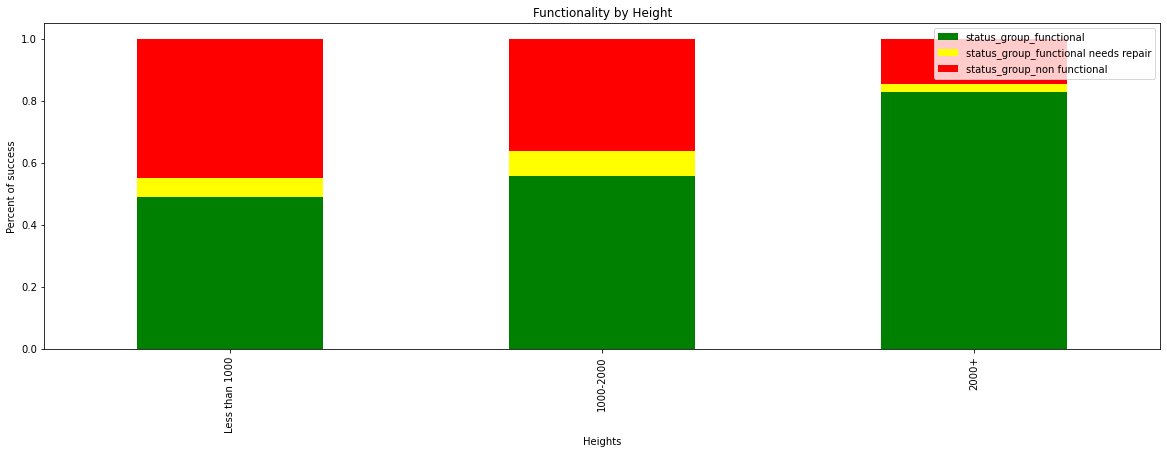

In [22]:
h_group = ['Less than 1000', '1000-2000', '2000+']

plt.rcParams.update({"figure.figsize": (20, 6)})
height_g.reset_index().plot(x="grouped_height", y=["status_group_functional", "status_group_functional needs repair", "status_group_non functional"], kind="bar", stacked = True, color=['green', 'yellow', 'red'])
plt.title("Functionality by Height")
plt.xlabel("Heights")
plt.ylabel("Percent of success")
plt.xticks(np.arange(len(h_group)), h_group)


**EXTRACTION TYPE**

Like we stated before, because there were no correlations between status group and the other numeric independent variables, we wanted to explore using catagorical variables for our decision tree. The problem with that was that for decision trees, the variables have to be a numerical value. To do this, we created a list of all the unique variables in extraction type class (ex). We then used a def function to create many if/else statements that would return a numerical value for each extraction type in "ex" and applied that def function to each dataframe for a new column in those dataframe (extraction).

In [23]:
ex = train_df.extraction_type_class.unique()
ex = ex.tolist()
print(ex)

['gravity', 'submersible', 'handpump', 'other', 'motorpump', 'wind-powered', 'rope pump']


In [24]:
def f(x):
    if x['extraction_type_class'] == ex[0]: return 1
    elif x['extraction_type_class'] == ex[1]: return 2
    elif x['extraction_type_class'] == ex[2]: return 3
    elif x['extraction_type_class'] == ex[3]: return 4
    elif x['extraction_type_class'] == ex[4]: return 5
    elif x['extraction_type_class'] == ex[5]: return 6
    elif x['extraction_type_class'] == ex[6]: return 7
    else: return 0
combine = [train_df, test_df]
for dataset in combine:
    dataset['extraction'] = 0
    dataset['extraction'] = dataset.apply(f, axis=1)

Once we created the extraction column, we copied what we did for grouped_height and created a dataframe (extract) that showed the status groups mean values for each value in extraction. We made the same table from grouped_height for extraction. As one can see, there is a clear seperation between extraction type and functionality. The "other" column is the variable that has the highest likelihood to not work and "gravity" has the highest likelihood to need repair.

In [25]:
extract = train_df.groupby('extraction').mean()
extract = extract.drop(['id','amount_tsh','gps_height','latitude','longitude',
                          'district_code','num_private','region_code','population','construction_year',
                         'basin_no', 'grouped_height'], axis=1)
extract.head()

,status_group_functional,status_group_functional needs repair,status_group_non functional
extraction,,,
1,0.599253,0.100859,0.299888
2,0.538760,0.040945,0.420295
3,0.630469,0.060464,0.309067
4,0.160031,0.032037,0.807932
5,0.379980,0.046200,0.573820


([<matplotlib.axis.XTick at 0x19b959576d0>,
 [Text(0, 0, 'gravity'),
  Text(0, 0, 'submersible'),
  Text(0, 0, 'handpump'),
  Text(0, 0, 'other'),
  Text(0, 0, 'motorpump'),
  Text(0, 0, 'wind-powered'),
  Text(0, 0, 'rope pump')])

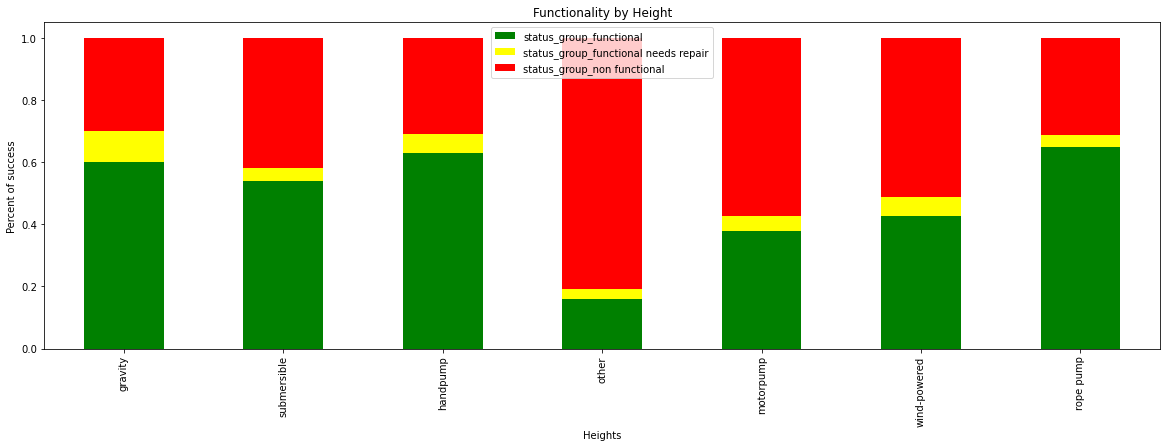

In [26]:
plt.rcParams.update({"figure.figsize": (20, 6)})
extract.reset_index().plot(
    x="extraction", y=["status_group_functional", "status_group_functional needs repair", "status_group_non functional"], 
    kind="bar", stacked = True, color=['green', 'yellow', 'red'])
plt.title("Functionality by Height")
plt.xlabel("Heights")
plt.ylabel("Percent of success")
plt.xticks(np.arange(len(ex)), ex)

**QUANTITY**

For quantity, we copied what we did for extraction type and tailored it to fit the quantity variable. For the graph that was produced, the "dry" column produced the highest non-functional percentage with 96.8% of the records with a dry quantity being non-functional: this can be seen in the dtataframe "quant" (Dry: 3). Like extraction type, there is signifiance between quantity and functionality because the graphs for each functionality do not show the same proportion of functionality.

In [27]:
quantity_list= train_df.quantity.unique()
quantity_list= quantity_list.tolist()
print(quantity_list)

['enough', 'insufficient', 'dry', 'seasonal', 'unknown']


In [28]:
def q(x):
    if x['quantity'] == quantity_list[0]: return 1
    elif x['quantity'] == quantity_list[1]: return 2
    elif x['quantity'] == quantity_list[2]: return 3
    elif x['quantity'] == quantity_list[3]: return 4
    elif x['quantity'] == quantity_list[4]: return 5
    else: return 0
combine = [train_df, test_df]
for dataset in combine:
    dataset['quantity_dummy'] = 0
    dataset['quantity_dummy'] = dataset.apply(q, axis=1)

In [29]:
quant = train_df.groupby('quantity_dummy').mean()
quant = quant.drop(['id','amount_tsh','gps_height','latitude','longitude',
                          'district_code','num_private','region_code','population','construction_year',
                          'basin_no', 'grouped_height','extraction'], axis=1)
quant.head()

,status_group_functional,status_group_functional needs repair,status_group_non functional
quantity_dummy,,,
1,0.652323,0.072320,0.275357
2,0.523234,0.095842,0.380924
3,0.025136,0.005924,0.968940
4,0.574074,0.102716,0.323210
5,0.269962,0.017744,0.712294


([<matplotlib.axis.XTick at 0x19b95ca9280>,
 [Text(0, 0, 'enough'),
  Text(0, 0, 'insufficient'),
  Text(0, 0, 'dry'),
  Text(0, 0, 'seasonal'),
  Text(0, 0, 'unknown')])

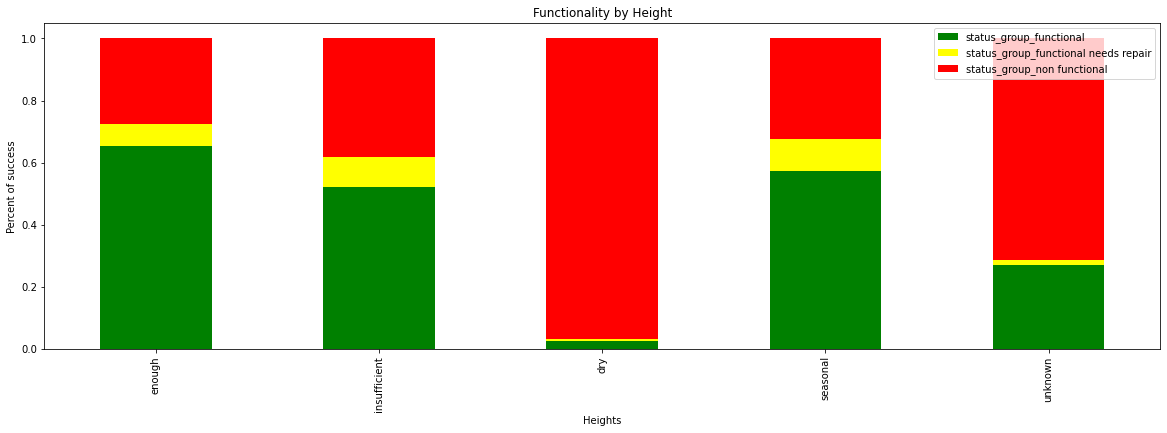

In [30]:
plt.rcParams.update({"figure.figsize": (20, 6)})
quant.reset_index().plot(
    x="quantity_dummy", y=["status_group_functional", "status_group_functional needs repair", "status_group_non functional"], 
    kind="bar", stacked = True, color=['green', 'yellow', 'red'])
plt.title("Functionality by Height")
plt.xlabel("Heights")
plt.ylabel("Percent of success")
plt.xticks(np.arange(len(quantity_list)), quantity_list)

**QUALITY**

We did the same thing with quality that we did with quantity and extraction type. There is signifiance between the functionality and the quality of the water because of all of the difference bar color distributions. The "unknown" variable had the highest non-functional percentage. Fluoride abandoned has no pumps that needed repair because there was no yellow in that bar, yet flouride had the highest functionality rate (75.5%)

In [31]:
quality_list= train_df.water_quality.unique()
quality_list= quality_list.tolist()
print(quality_list)

['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured', 'salty abandoned', 'fluoride abandoned']


In [32]:
def qual(x):
    if x['water_quality'] == quality_list[0]: return 1
    elif x['water_quality'] ==  quality_list[1]: return 2
    elif x['water_quality'] ==  quality_list[2]: return 3
    elif x['water_quality'] ==  quality_list[3]: return 4
    elif x['water_quality'] ==  quality_list[4]: return 5
    elif x['water_quality'] ==  quality_list[5]: return 6
    elif x['water_quality'] ==  quality_list[6]: return 7
    elif x['water_quality'] ==  quality_list[7]: return 8
    else: return 0
combine = [train_df, test_df]
for dataset in combine:
    dataset['quality'] = 0
    dataset['quality'] = dataset.apply(qual, axis=1)

In [33]:
qual = train_df.groupby('quality').mean()
qual = qual.drop(['id','amount_tsh','gps_height','latitude','longitude',
                          'district_code','num_private','region_code','population','construction_year',
                          'basin_no', 'grouped_height','extraction', 'quantity_dummy'], axis=1)
qual.head(len(quality_list))

,status_group_functional,status_group_functional needs repair,status_group_non functional
quality,,,
1,0.565941,0.076823,0.357236
2,0.457166,0.046334,0.496499
3,0.544776,0.017413,0.437811
4,0.140725,0.018657,0.840618
5,0.755000,0.065000,0.180000
6,0.502041,0.110204,0.387755
7,0.513274,0.212389,0.274336
8,0.352941,0.000000,0.647059


([<matplotlib.axis.XTick at 0x19b95cc2c40>,
 [Text(0, 0, 'soft'),
  Text(0, 0, 'salty'),
  Text(0, 0, 'milky'),
  Text(0, 0, 'unknown'),
  Text(0, 0, 'fluoride'),
  Text(0, 0, 'coloured'),
  Text(0, 0, 'salty abandoned'),
  Text(0, 0, 'fluoride abandoned')])

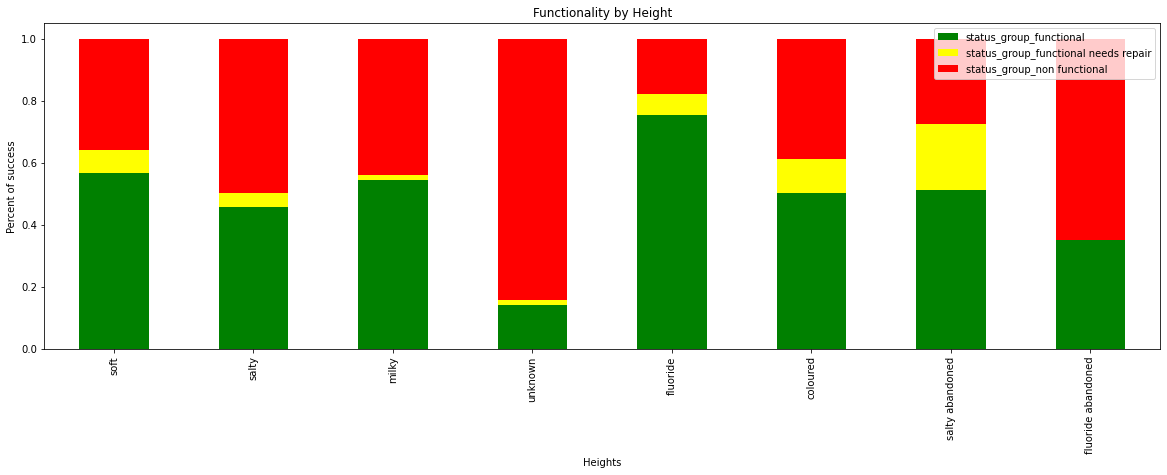

In [34]:
plt.rcParams.update({"figure.figsize": (20, 6)})
qual.reset_index().plot(
    x="quality", y=["status_group_functional", "status_group_functional needs repair", "status_group_non functional"], 
    kind="bar", stacked = True, color=['green', 'yellow', 'red'])
plt.title("Functionality by Height")
plt.xlabel("Heights")
plt.ylabel("Percent of success")
plt.xticks(np.arange(len(quality_list)), quality_list)

**CONSTRUCTION YEAR AND PUMP AGE**


**Exploring Construction Year** 

Let's look at our variable constuction_year and see if there is an effective way to replace the null values. From the code below, we see that there are a multitude of construction years that are equal to zero.

We first replaced all of the 0's with the rounded mean of all of the values not equal to 0 (1997). This worked, but we thought that this could be more intricit that using one variable to replace them all.

Our main thought was that we wanted to find another indepented variable that could generate different construction years based on that one independent variable. To do this, we created two tables (train00, test00) that dropped the construction years equal to zero so we could visualize the correlation between construction year and the other independent variables to find values to replace all the zero construction years with valid years.

In [35]:
train_df.construction_year.isin([0]).sum()

20709

In [36]:
#Drop all values where construction year = 0 in new dfs
train00 = train_df.drop(train_df[train_df.construction_year == 0].index)
test00 = test_df.drop(test_df[test_df.construction_year == 0].index)
train00.construction_year.isin([0]).sum()

0

We decided to plot construction year against a variety of other variables in order to observe patterns in the data.
Observations:
- Extraction type class appears to give us insight on construction year. The rope pump method wasn't consistently used until the 1990's.
- LGA is also another possible insightful variable. It appears that different locations starting building pump in different years, however, since there are so many categories (and therefore less datapoints in each) it is hard to tell if this is just a coincidence. 

Based on these observations, we decided to use extraction_type_class to replace the null values in construction year.

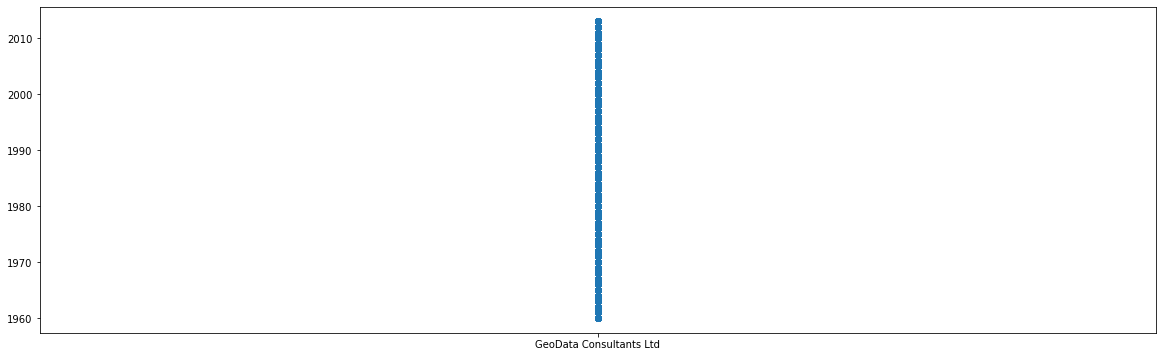

In [37]:
x=train00['recorded_by']
y=train00['construction_year']

plt.scatter(x, y)

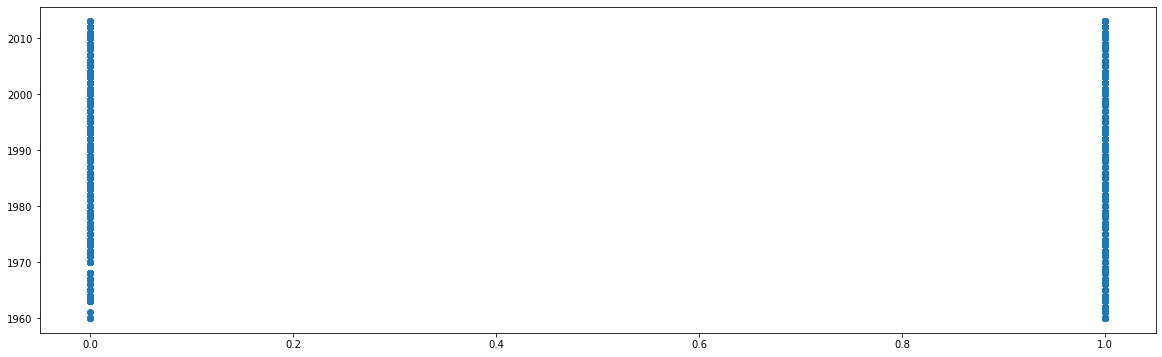

In [38]:
x=train00['public_meeting']
y=train00['construction_year']

plt.scatter(x, y)

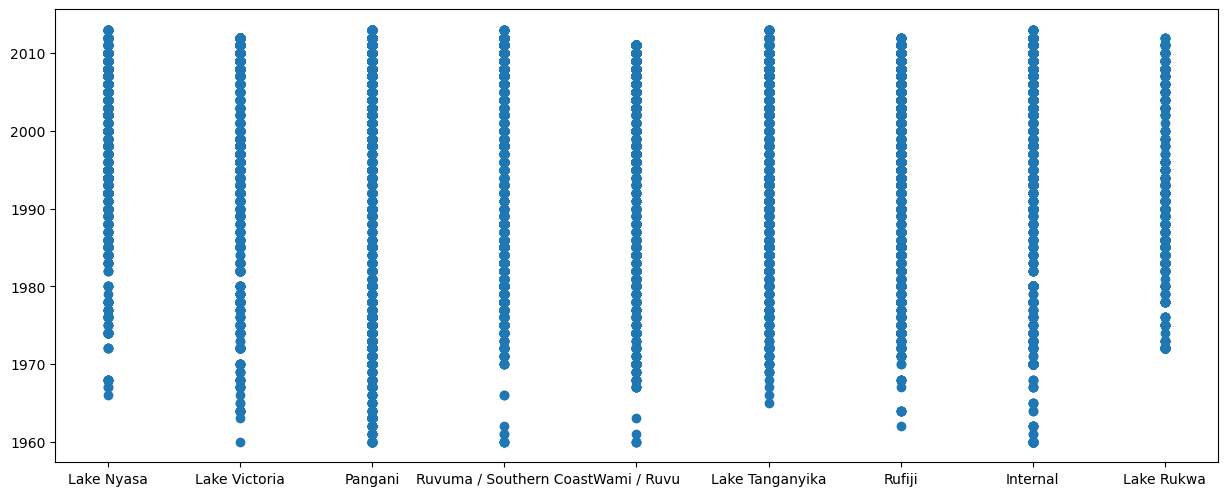

In [39]:
x=train00['basin']
y=train00['construction_year']
plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':100})
plt.scatter(x, y)

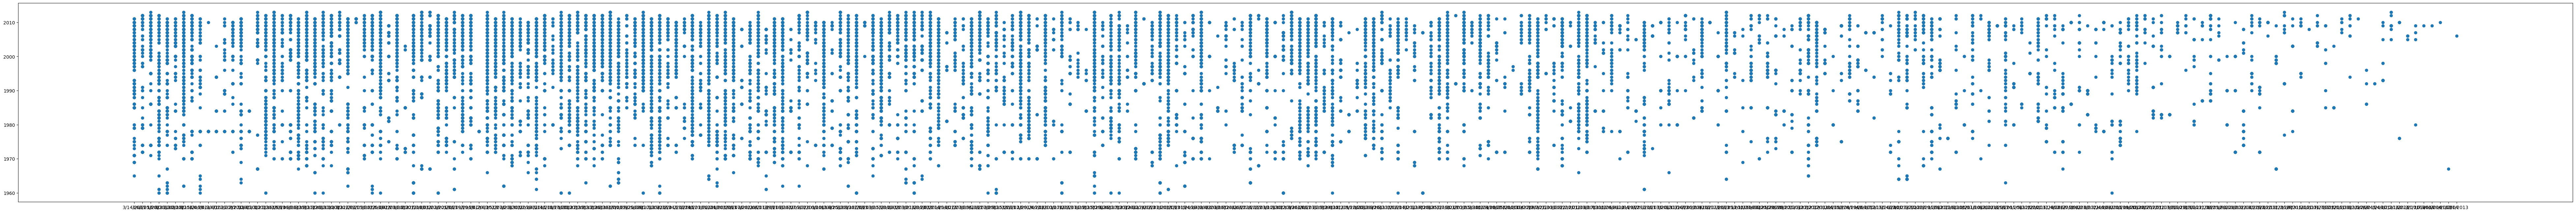

In [40]:
#Date is not in order, could possibly be an insightful variable if viewed in chronological order
x=train00['date_recorded']
y=train00['construction_year']
plt.rcParams.update({'figure.figsize':(100,8), 'figure.dpi':100})
plt.scatter(x, y)

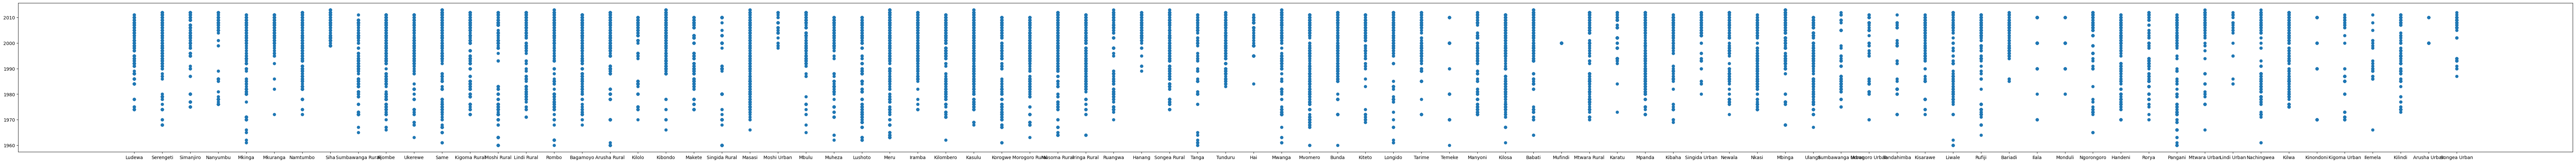

In [41]:
#Interesting data, lga= geographic location
x=train00['lga']
y=train00['construction_year']
plt.rcParams.update({'figure.figsize':(100,6), 'figure.dpi':100})
plt.scatter(x, y)

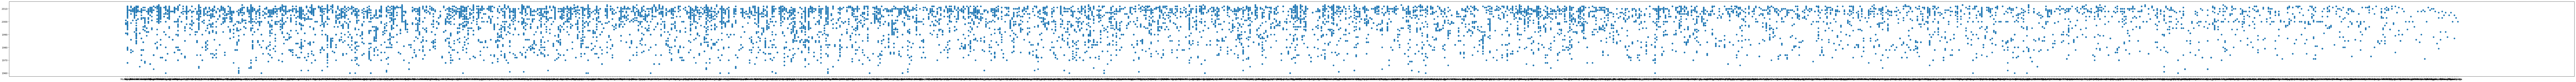

In [42]:
x=train00['ward']
y=train00['construction_year']
plt.rcParams.update({'figure.figsize':(200,6), 'figure.dpi':100})
plt.scatter(x, y)

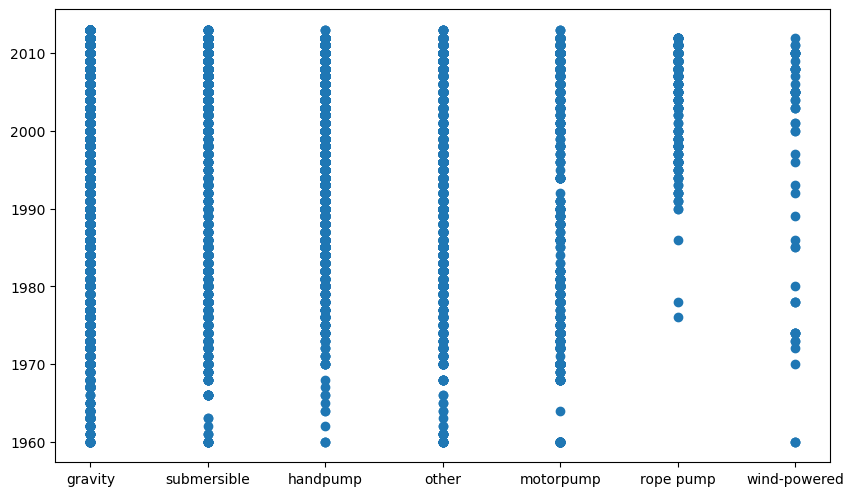

In [43]:
x=train00['extraction_type_class']
y=train00['construction_year']
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})
plt.scatter(x, y)

We decided to replace the null values of construction year with the means of the construction year in each extraction type class group. To do this, we created two more dataframe (construct_test, construct_train) that group each mean by the extraction type class. From there, our group created a list (extr) that created a list of the extraction types. From there, we created two more lists (train_year, test_year) that showed the mean construction years of each extraction type not including the records with 0.

In [44]:
construct_test = test00.groupby('extraction_type_class').mean()
construct_train =  train00.groupby('extraction_type_class').mean()
construct_train.head(10)

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group_functional,status_group_functional needs repair,status_group_non functional,basin_no,grouped_height,extraction,quantity_dummy,quality
extraction_type_class,,,,,,,,,,,,,,,,,,
gravity,36997.217426,540.089685,1256.012268,35.606455,-5.937764,0.575964,10.875663,4.665648,195.774812,1995.965949,0.632349,0.090836,0.276815,4.533450,1.790085,1.0,1.593190,1.080371
handpump,37223.283300,456.547679,858.339430,35.760385,-6.704382,0.299193,19.055878,6.838295,394.059284,1999.485999,0.607467,0.040363,0.352170,5.475025,1.477043,3.0,1.666372,1.395055
motorpump,37459.882315,622.684887,649.097749,37.178628,-6.680170,1.563987,28.917685,11.849518,221.646945,1992.744695,0.375563,0.031511,0.592926,5.836013,1.394212,5.0,1.801929,1.668810
other,36776.839224,126.954345,790.282222,35.848307,-6.459499,0.079989,24.819027,8.749402,339.854637,1993.136859,0.146691,0.029763,0.823545,5.017539,1.452299,4.0,2.015147,1.625565
rope pump,38296.064103,235.205128,1316.300000,35.171455,-5.725793,0.000000,13.641026,3.307692,246.133333,2005.810256,0.705128,0.030769,0.264103,5.171795,1.833333,7.0,1.494872,1.220513
submersible,37244.662818,418.009206,566.579817,37.633292,-6.426543,2.144705,18.923965,6.124005,326.829021,1999.306529,0.563296,0.043193,0.393511,5.110470,1.275478,2.0,1.548567,1.344944
wind-powered,35148.442623,78.606557,1219.344262,35.453863,-5.057899,0.000000,11.196721,3.000000,714.377049,1995.377049,0.311475,0.065574,0.622951,5.426230,1.803279,6.0,1.983607,1.540984


In [45]:
extr = construct_train.index
extr = extr.tolist()
print(extr)

['gravity', 'handpump', 'motorpump', 'other', 'rope pump', 'submersible', 'wind-powered']


In [46]:
train_year = construct_train.construction_year.unique()
test_year = construct_test.construction_year.unique()
years = [train_year, test_year]
for x in years:
    x = x.tolist()
    print(x)


[1995.965948923385, 1999.4859989909182, 1992.744694533762, 1993.1368588891842, 2005.8102564102564, 1999.3065286624203, 1995.377049180328]
[1996.2153080273802, 1999.3692535837865, 1993.8494897959183, 1993.8079748163693, 2004.9708737864078, 1999.6338028169014, 1997.95]


The two def functions below (f, g) replaced the 0's in construction_year by using the function as a condition, like it did for the other categorical variables above, for both dataframes. There are lists printed on the bottom of both tables to ensure there are no floats in the list. 

In [47]:
# Construction Year (TRAIN_DF)
def f(x):
      if x['construction_year'] == 0 and x['extraction_type_class'] == extr[0]: return round(train_year[0])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[1]: return round(train_year[1])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[2]: return round(train_year[2])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[3]: return round(train_year[3])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[4]: return round(train_year[4])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[5]: return round(train_year[5])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[6]: return round(train_year[6])
      else: return x['construction_year']
train_df['construction_year'] = train_df.apply(f, axis=1)
train_df.construction_year.unique()


array([1999., 2010., 2009., 1986., 1996., 2011., 1987., 1991., 1978.,
       1992., 2008., 1974., 2000., 2002., 2004., 1972., 2003., 1980.,
       1995., 2007., 1973., 1985., 1970., 1993., 2006., 1962., 2005.,
       1997., 2012., 1977., 1983., 1984., 1990., 1982., 1976., 1988.,
       1989., 1975., 1960., 1961., 1998., 1963., 1971., 1994., 1968.,
       2001., 1979., 1967., 2013., 1969., 1981., 1964., 1966., 1965.])

In [48]:
# Construction Year (TEST_DF)
def g(x):
      if x['construction_year'] == 0 and x['extraction_type_class'] == extr[0]: return round(test_year[0])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[1]: return round(test_year[1])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[2]: return round(test_year[2])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[3]: return round(test_year[3])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[4]: return round(test_year[4])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[5]: return round(test_year[5])
      elif x['construction_year'] == 0 and x['extraction_type_class'] == extr[6]: return round(test_year[6])
      else: return x['construction_year']
test_df['construction_year'] = test_df.apply(g, axis=1)
test_df.construction_year.unique()

array([2012., 2000., 2010., 1987., 1990., 2007., 1982., 1997., 2003.,
       2006., 2002., 1994., 1984., 1989., 1999., 1978., 1996., 2008.,
       2005., 1970., 2009., 1998., 1971., 1972., 1983., 1974., 1992.,
       2004., 2011., 1988., 1962., 1986., 1985., 1969., 1960., 1975.,
       1981., 1995., 1963., 1977., 2001., 1993., 1991., 1976., 1980.,
       2013., 1979., 1967., 1973., 1968., 1965., 1961., 1966., 1964.])

**Creating pump_age variable**

To create the pump_age, we wanted to use the year of the date the pump record was recorded and the construction year. There was no seperate year recorded column, but the function below extracts the year from the date_recorded column, puts it in a new column (year_recorded), and turns it into an integer so it can be used as a number. The cell after that creates the column, pump_age, in each dataframe by subtracting the construction_year from the year_recorded. We thought this was necessary because the details for the pump were recorded and built in different year, so creating pump_age combined the two variables together to create a more uniform variable to use in our decision tree. 

In [49]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['year_recorded'] = pd.DatetimeIndex(dataset['date_recorded']).year
    dataset['year_recorded'] = dataset.year_recorded.astype(np.int64)
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group_functional,status_group_functional needs repair,status_group_non functional,basin_no,grouped_height,extraction,quantity_dummy,quality,year_recorded
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,0,0,1,2,1,1,1,2011
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,0,0,2,2,1,2,1,2013
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,0,0,3,1,1,1,1,2013
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,0,1,4,1,2,3,1,2013
4,19728,0.0,7/13/2011,Action In A,1329,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,1996.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,0,0,2,2,1,4,1,2011


In [50]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['pump_age']= dataset['year_recorded'] - dataset['construction_year']
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,basin_no,grouped_height,extraction,quantity_dummy,quality,year_recorded,pump_age
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,1101.646397,35.123630,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1997.087273,4.656296,1.717912,2.278249,1.717710,1.297778,2011.906128,14.818855
std,21359.364833,2510.968644,541.189685,2.585898,2.940803e+00,8.167910,17.191329,9.673842,469.499332,9.974852,2.427059,0.493157,1.345252,0.986905,0.909436,0.966373,10.009453
min,10.000000,0.000000,-57.000000,29.612776,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,1960.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2001.000000,-7.000000
25%,18727.000000,0.000000,754.000000,33.282807,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,1994.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2011.000000,8.000000
50%,37361.500000,0.000000,1309.000000,34.972424,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1999.000000,5.000000,2.000000,2.000000,1.000000,1.000000,2012.000000,14.000000
75%,55799.750000,25.000000,1488.000000,37.201765,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000,7.000000,2.000000,3.000000,2.000000,1.000000,2013.000000,18.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000,9.000000,3.000000,7.000000,5.000000,8.000000,2013.000000,53.000000


In the pump_age section of the describe function table above, the min value is negative, which makes no sense. To resolve this, the function below finds all the values less than 0 and replaces them with 0. The value below shows the new lowest pump age in the dataframe, which is now 0. 

In [51]:
def condition(value):
    if value < 0:
        return 0
    return value
combine = [train_df, test_df]
for dataset in combine:
    dataset['pump_age'] = dataset['pump_age'].apply(condition)
train_df.pump_age.min()

0.0

To visualize this, we copied the cells we used for grouped height and adjusted it to fit our new column, age_group. The graph shows that as the age_group increases, the functionality of the pump decreases, which shows us that pump_age is a useful variable. Like for grouped_height, we tried both pump_age and age_group in our desicion tree, and pump_age yielded the better results. Age_group helped us visualize the correlation between pump_age and the funcationality of the pump.

In [52]:
combine = [train_df, test_df]
for dataset in combine:
    dataset['age_group'] = 0
    dataset.loc[(dataset['pump_age'] < 9), 'age_group'] = 1
    dataset.loc[(dataset['pump_age'] >= 9) & (dataset['pump_age'] < 18), 'age_group'] = 2
    dataset.loc[(dataset['pump_age'] >= 18) & (dataset['pump_age'] < 27), 'age_group'] = 3
    dataset.loc[(dataset['pump_age'] >= 27) & (dataset['pump_age'] < 36), 'age_group'] = 4
    dataset.loc[(dataset['pump_age'] >= 36) & (dataset['pump_age'] < 45), 'age_group'] = 5
    dataset.loc[(dataset['pump_age'] >= 45), 'age_group'] = 6

In [53]:
ages = train_df.groupby('age_group').mean()
ages = ages.drop(['id','amount_tsh','gps_height','latitude','longitude',
                          'district_code','num_private','region_code','population','construction_year',
                         'year_recorded', 'basin_no', 'grouped_height', 'extraction', 
                         'quantity_dummy', 'quality', 'pump_age'], axis=1)
ages.head()

,status_group_functional,status_group_functional needs repair,status_group_non functional
age_group,,,
1,0.686446,0.055825,0.257729
2,0.582097,0.086821,0.331082
3,0.397319,0.057565,0.545116
4,0.348891,0.077085,0.574024
5,0.299579,0.077968,0.622452


([<matplotlib.axis.XTick at 0x19b9f3f84c0>,
 [Text(0, 0, '0-9'),
  Text(0, 0, '9-18'),
  Text(0, 0, '18-27'),
  Text(0, 0, '27-36'),
  Text(0, 0, '36-45'),
  Text(0, 0, '45+')])

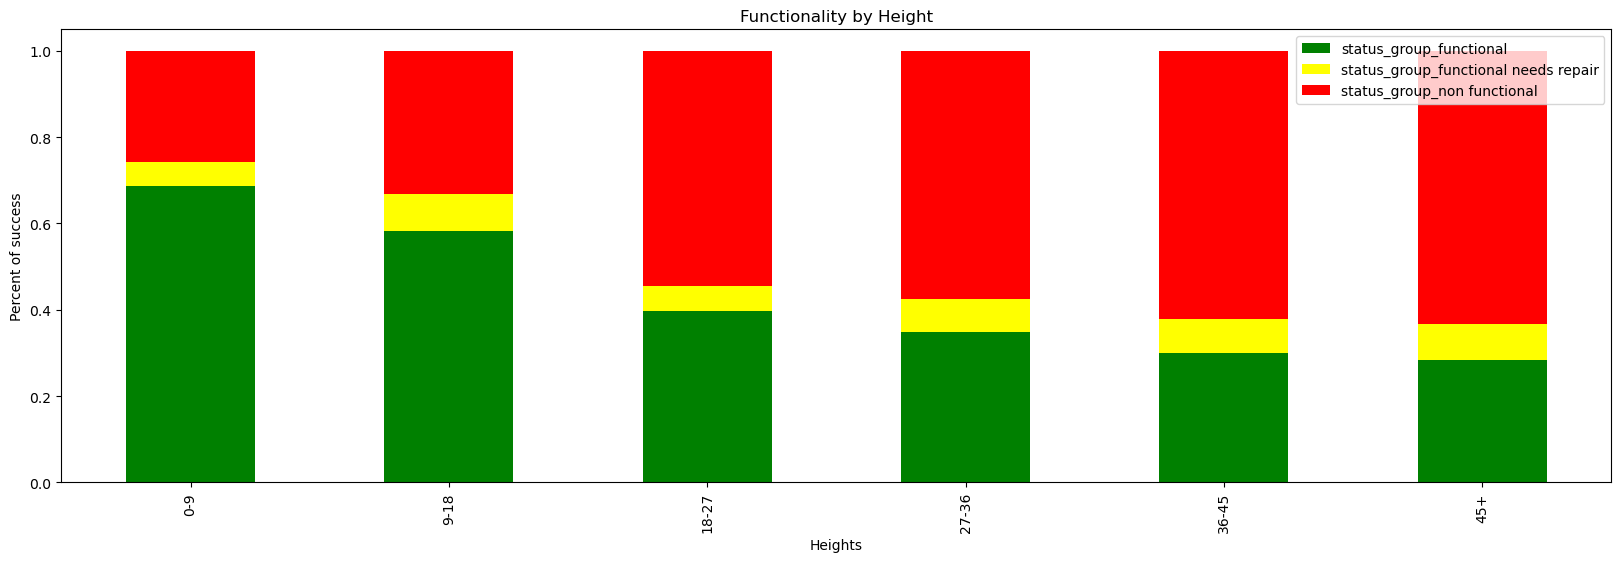

In [54]:
age_list = ['0-9','9-18', '18-27', '27-36', '36-45', '45+']

plt.rcParams.update({"figure.figsize": (20, 6)})
ages.reset_index().plot(
    x="age_group", y=["status_group_functional", "status_group_functional needs repair", "status_group_non functional"], 
    kind="bar", stacked = True, color=['green', 'yellow', 'red'])
plt.title("Functionality by Height")
plt.xlabel("Heights")
plt.ylabel("Percent of success")
plt.xticks(np.arange(len(age_list)), age_list)

**DECISION TREE**

*disclaimer: this decision tree is a result of many different iterations. While those decision trees are no longer avalible for use, they helped us arrive to our final model below. 

To create our decision tree, we used 6 variables to use as our independent variables from our train_df: gps_height, region_code, extraction, quantity_dummy, quality, and pump_age (X_train). We used the status group dummy variables as our dependent variables (Y_train). Our decision tree (decision_tree) was created by fitting X_train to Y_train. The two cells after that create a printed out desicion tree that is exported as a dot file to one's downloads file.

In [55]:
X_train = train_df[['gps_height', 'region_code', 'extraction', 'quantity_dummy', 'quality', 'pump_age']]
X_train.head()

,gps_height,region_code,extraction,quantity_dummy,quality,pump_age
0,1390,11,1,1,1,12.0
1,1399,20,1,2,1,3.0
2,686,21,1,1,1,4.0
3,263,90,2,3,1,27.0
4,1329,18,1,4,1,15.0


In [56]:
Y_train = train_df[['status_group_functional', 'status_group_functional needs repair', 'status_group_non functional']]

In [57]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(min_samples_leaf=50)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [58]:
! pip install graphviz
import graphviz
from sklearn import tree

In [59]:
dot_data = tree.export_graphviz(decision_tree, out_file='C:/Users/student/Downloads/tree.dot')

To get the final predictions, we used the 6 variables mentioned above from our test_df (X_test). From there, we ran X_test in our decision tree predictor. This generated a list (Y_pred) within an array where each value was another list that generated either a 1 or a 0 for our three dummy dependent variables. Since our submission had to be in the form of "functional", "functional needs repair", and "non functional", our group had to create a new list (submission) which assigned each distinct combination to one of these three strings. With that, we created our final dataframe (df) that had the record id and its predicted status group. We ran a head function on the dataframe to confirm its format and exported it as a csv to to the user's download folder.

In [60]:
X_test = test_df[['gps_height', 'region_code', 'extraction', 'quantity_dummy', 'quality', 'pump_age']]
X_test.head()

,gps_height,region_code,extraction,quantity_dummy,quality,pump_age
0,1996,21,4,4,1,1.0
1,1569,2,1,2,1,13.0
2,1567,13,4,2,1,3.0
3,267,80,4,3,1,26.0
4,1260,10,1,1,1,13.0


In [61]:
Y_pred = decision_tree.predict(X_test)

In [62]:
Y_pred

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [63]:
submission = []
for scores in Y_pred:
    if scores[0] == 1:
        submission.append('functional')
    elif scores[1] == 1:
        submission.append('functional needs repair')
    else:
        submission.append('non functional')

In [64]:
df = pd.DataFrame()

In [65]:
df['id'] = test_df.id

In [66]:
df['status_group'] = submission

In [67]:
df.head()

,id,status_group
0,50785,non functional
1,51630,non functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [68]:
df.to_csv('C:/Users/student/Downloads/submission.csv', index=False)

**OUR RESULTS**

After many tries, our team's final notebook produced a submission score of .7233. If we had more time, we planned on utilizing some of the larger independent variables such as lga, funder, and ward. These variables would require binning and cleaning that we attempted to do unsuccessfully and concluded we would need more time and experience to do so. We would also try to use more complex functions such as linear regressions, but given the time we had to work on this, we decided that it was best not to attempt these larger endeavors. Through this project, we learned creative ways to explore, visualize, and predict data and will use these acquired skills in our next project. 

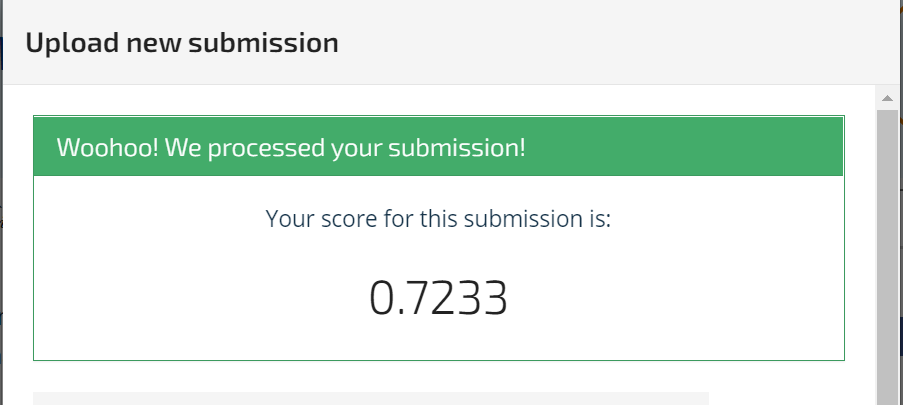

In [69]:
from IPython.display import Image
Image('C:/Users/student/Pictures/submission.png')